In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

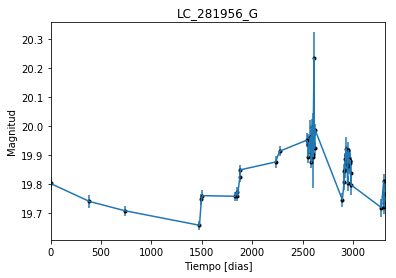

In [2]:
data = np.genfromtxt('LC_281956_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_281956_G')
plt.savefig("LC_281956_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

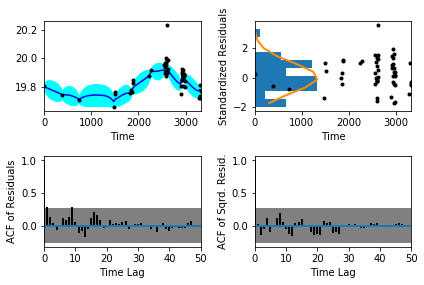

In [5]:
sample.assess_fit()

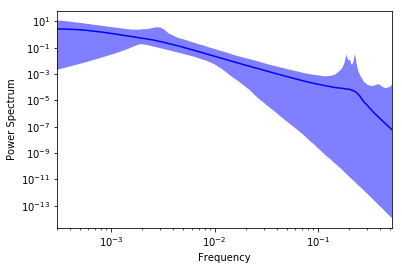

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

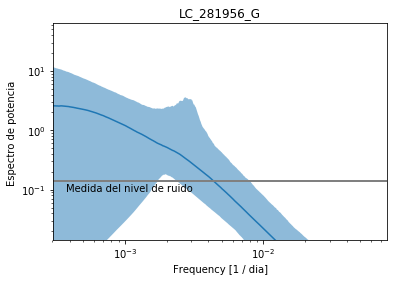

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_281956_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_281956_G')

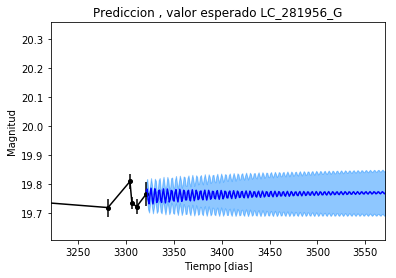

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_281956_G')

Text(0.5,1,'Prediccion, Caminos simulados_LC_281956_G')

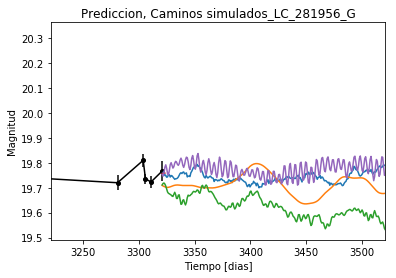

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_281956_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


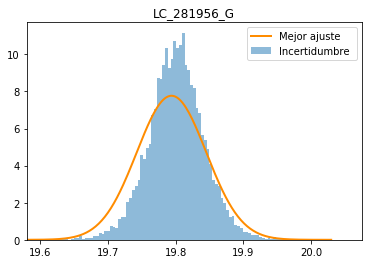

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_281956_G')
plt.savefig("Mejor_ajuste_LC_281956_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_281956_G')

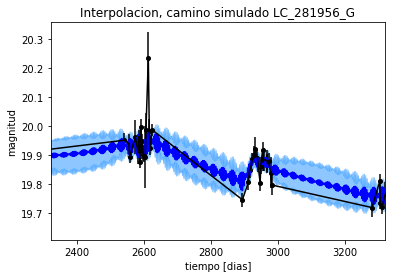

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_281956_G')

Text(0.5,1,'Interpolacion, camino simulado LC_281956_G')

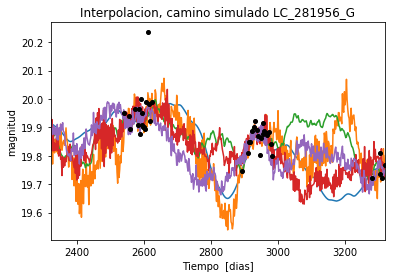

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_281956_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 770.948801411
Median: 0.00629314212665
Standard deviation: 0.125035372262
68% credibility interval: [ 0.00112991  0.05336612]
95% credibility interval: [  3.56688446e-04   4.66406986e-01]
99% credibility interval: [  3.18255034e-04   8.39666620e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 551.370993882
Median: 0.00468900313385
Standard deviation: 0.0755182767675
68% credibility interval: [ 0.00078043  0.02515004]
95% credibility interval: [ 0.00033592  0.23353982]
99% credibility interval: [  3.14061253e-04   5.65603733e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 793.766919818
Median: 0.0852758615852
Standard

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 298.488978176
Median: 102.929584014
Standard deviation: 2.77103741618
68% credibility interval: [ 100.46959194  106.30119939]
95% credibility interval: [  97.96524636  108.14993471]
99% credibility interval: [  95.74877308  108.69647604]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 601.532994859
Median: 0.983127930931
Standard deviation: 2.24161895052
68% credibility interval: [ 0.12193431  4.34879038]
95% credibility interval: [ 0.03679079  7.32183473]
99% credibility interval: [  0.02149857  10.00518742]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 238.510771722
Median: 2.00368680564
Standard deviation: 10.0524287249
68% credibility interval: [  0.37508433  13.47076191]
95% credibility interval: [  7.20409396

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 94.8049256781
Median: 3.94380418174e-19
Standard deviation: 1.2011139657e+149
68% credibility interval: [  4.02356980e-86   3.90017356e+63]
95% credibility interval: [  4.55826185e-134   5.69023718e+148]
99% credibility interval: [  2.99282804e-198   9.35371943e+149]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 543.445253991
Median: 19.8004334122
Standard deviation: 0.0428365765512
68% credibility interval: [ 19.75917677  19.83315693]
95% credibility interval: [ 19.70107457  19.87765762]
99% credibility interval: [ 19.65423752  19.90634216]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 191.605948894
Median: 0.20272436383
Standard deviation: 0.243753930041
68% credibility interval: [ 0.00299692  0.52219878]
95% credibility interval: [ 0.          0.86049511]
99% credibility interval: [ 0.          1.01773894]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 191.605948894
Median: 0.20272436383
Standard deviation: 0.243753930041
68% credibility interval: [ 0.00299692  0.52219878]
95% credibility interval: [ 0.          0.86049511]
99% credibility interval: [ 0.          1.01773894]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 233.37200218
Median: 0.0
Standard deviation: 0.000995505395854
68% credibi

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 298.488978176
Median: 102.929584014
Standard deviation: 2.77103741618
68% credibility interval: [ 100.46959194  106.30119939]
95% credibility interval: [  97.96524636  108.14993471]
99% credibility interval: [  95.74877308  108.69647604]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 756.927350057
Median: 0.00956033470795
Standard deviation: 0.00610977595359
68% credibility interval: [ 0.00616082  0.01575755]
95% credibility interval: [ 0.00420603  0.02560481]
99% credibility interval: [ 0.0033217   0.03891554]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 300.626162386
Median: 1.20290709123
Standard deviation: 0.258735165519
68% credibility interval: [ 0.95936108  1.49020652]
95% credibility interval: [ 0.78311741  1.79710477]
99% credibility interval: [ 0.70106904  1.93132728]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 240.991811894
Median: 0.00382061338865
Standard deviation: 0.294283858489
68% credibility interval: [  5.81680707e-67   6.71877552e-02]
95% credibility interval: [  2.58112968e-150   7.23042841e-001]
99% credibility interval: [  1.32762207e-151   1.64400615e+000]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 770.948801411
Median: (-0.0395409781462-1.45108510154j)
Standard deviation: 1.72129260812
68% credibility interval: [-0.33530925-2.19897882j -0.00709945-0.91221334j]
95% credibility interval: [ -2.93052152e+00-3.37890595j  -2.24113961e-03-1.42965791j]
99% credibility interval: [ -5.27578097e+00+0.j         -1.99965535e-03-1.4644856j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 551.370993882
Median: (-0.0294618755959+0.167093950375j)
Standard deviation: 1.60336977127
68% credibility interval: [-0.15802233+4.16115308j -0.00490361+1.43733882j]
95% credibility interval: [-1.46737396+3.4827126j -0.00211064+0.j       ]
99% credibility interval: [ -3.55379307e+00 +1.75183819e+00j  -1.97330505e-03 +1.63842557e-03j]
Posteri